<a href="https://colab.research.google.com/github/nattyix/Brain-Tumor-Detection/blob/main/MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

unzip the file


In [ ]:
import zipfile

zip_path = 'brain_mri_images.zip'
extract_path = 'brain_tumor_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped to /content/brain_mri")


Dataset unzipped to /content/brain_mri


In [ ]:
import os

yes_dir = os.path.join(extract_path, 'yes')
no_dir = os.path.join(extract_path, 'no')

print("Tumor (yes):", len(os.listdir(yes_dir)))
print("No Tumor (no):", len(os.listdir(no_dir)))


Tumor (yes): 155
No Tumor (no): 98


Load and preprocess the images using tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with rescaling and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values (0–255 → 0–1)
    validation_split=0.2,    # Reserve 20% for validation
    rotation_range=15,       # Random rotation for augmentation
    zoom_range=0.1,          # Random zoom
    horizontal_flip=True     # Flip images horizontally
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/brain_tumor_dataset',       # Root folder with yes/ and no/
    classes=['yes', 'no'],            # Only load these two folders
    target_size=(224, 224),                           # Resize all images to 224x224
    class_mode='binary',                              # yes = 1, no = 0
    batch_size=32,
    subset='training'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    '/content/brain_tumor_dataset',
    classes=['yes', 'no'],          # Only load these two folders
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Building CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model


In [31]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.9444 - loss: 0.1290 - val_accuracy: 0.8400 - val_loss: 0.7471
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.9414 - loss: 0.1516 - val_accuracy: 0.9000 - val_loss: 0.4486
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.9761 - loss: 0.0845 - val_accuracy: 0.8800 - val_loss: 0.5631
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.9595 - loss: 0.0833 - val_accuracy: 0.8600 - val_loss: 0.5805
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.9332 - loss: 0.1355 - val_accuracy: 0.8400 - val_loss: 0.5448
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.9203 - loss: 0.1505 - val_accuracy: 0.8600 - val_loss: 0.4164
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.9656 - loss: 0.1146 - val_accuracy: 0.8000 - val_loss: 0.6060
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.9648 - loss: 0.0867 - val_accuracy: 0.8800 - val_loss: 0.6911
Epoch 9/

Plot Training and Validation Accuracy/Loss

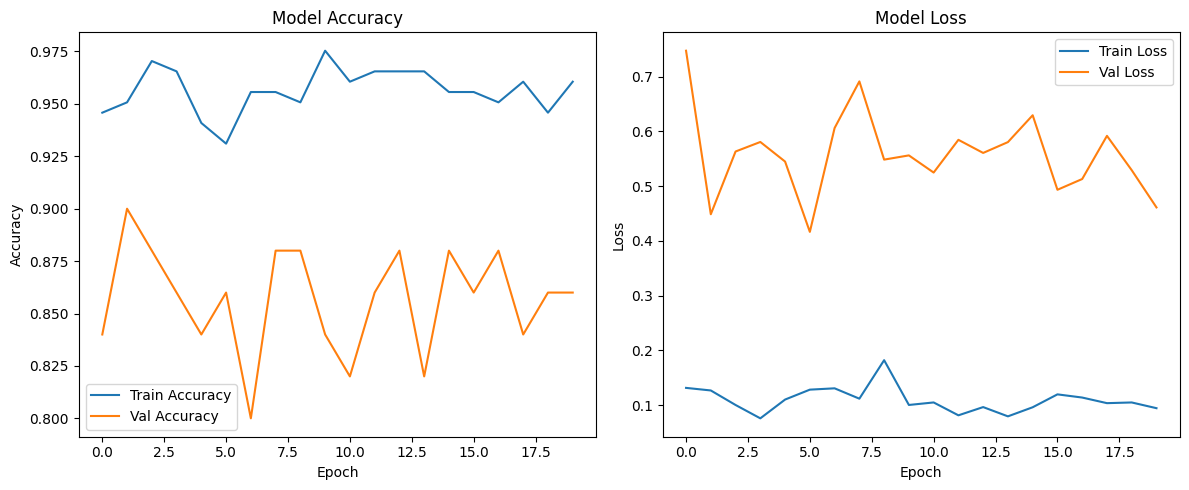

In [34]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Evaluating Model Performance

In [35]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")
print(f"Validation Loss: {loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 0.8042 - loss: 0.6494
Validation Accuracy: 80.00%
Validation Loss: 0.6604


Predict on New Images


In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to a sample image
img_path = '/content/No_Tumor.png'  # replace with a real image path

# Load the image and resize to match model input
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0         # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)

# Interpret result
if prediction[0][0] > 0.5:
    print("Prediction: Tumor detected")
else:
    print("Prediction: No tumor ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction: No tumor 
